In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
#Reading the file
file = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
file.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7358,7359,15797767,Ikedinachukwu,600,France,Female,49,6,0.00,1,0,1,148087.88,1
6043,6044,15760851,Gratton,629,France,Male,31,6,0.00,2,1,0,93881.75,0
5783,5784,15727041,Fiorentini,624,France,Male,71,7,0.00,2,1,1,108841.83,0
6992,6993,15808175,Castiglione,557,France,Female,39,7,49572.73,1,1,0,115287.99,1


In [3]:
#getting info about the data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#checking the shape of dataset
file.shape

(10000, 14)

In [6]:
# getting statistical summary
file.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Checking for null values

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

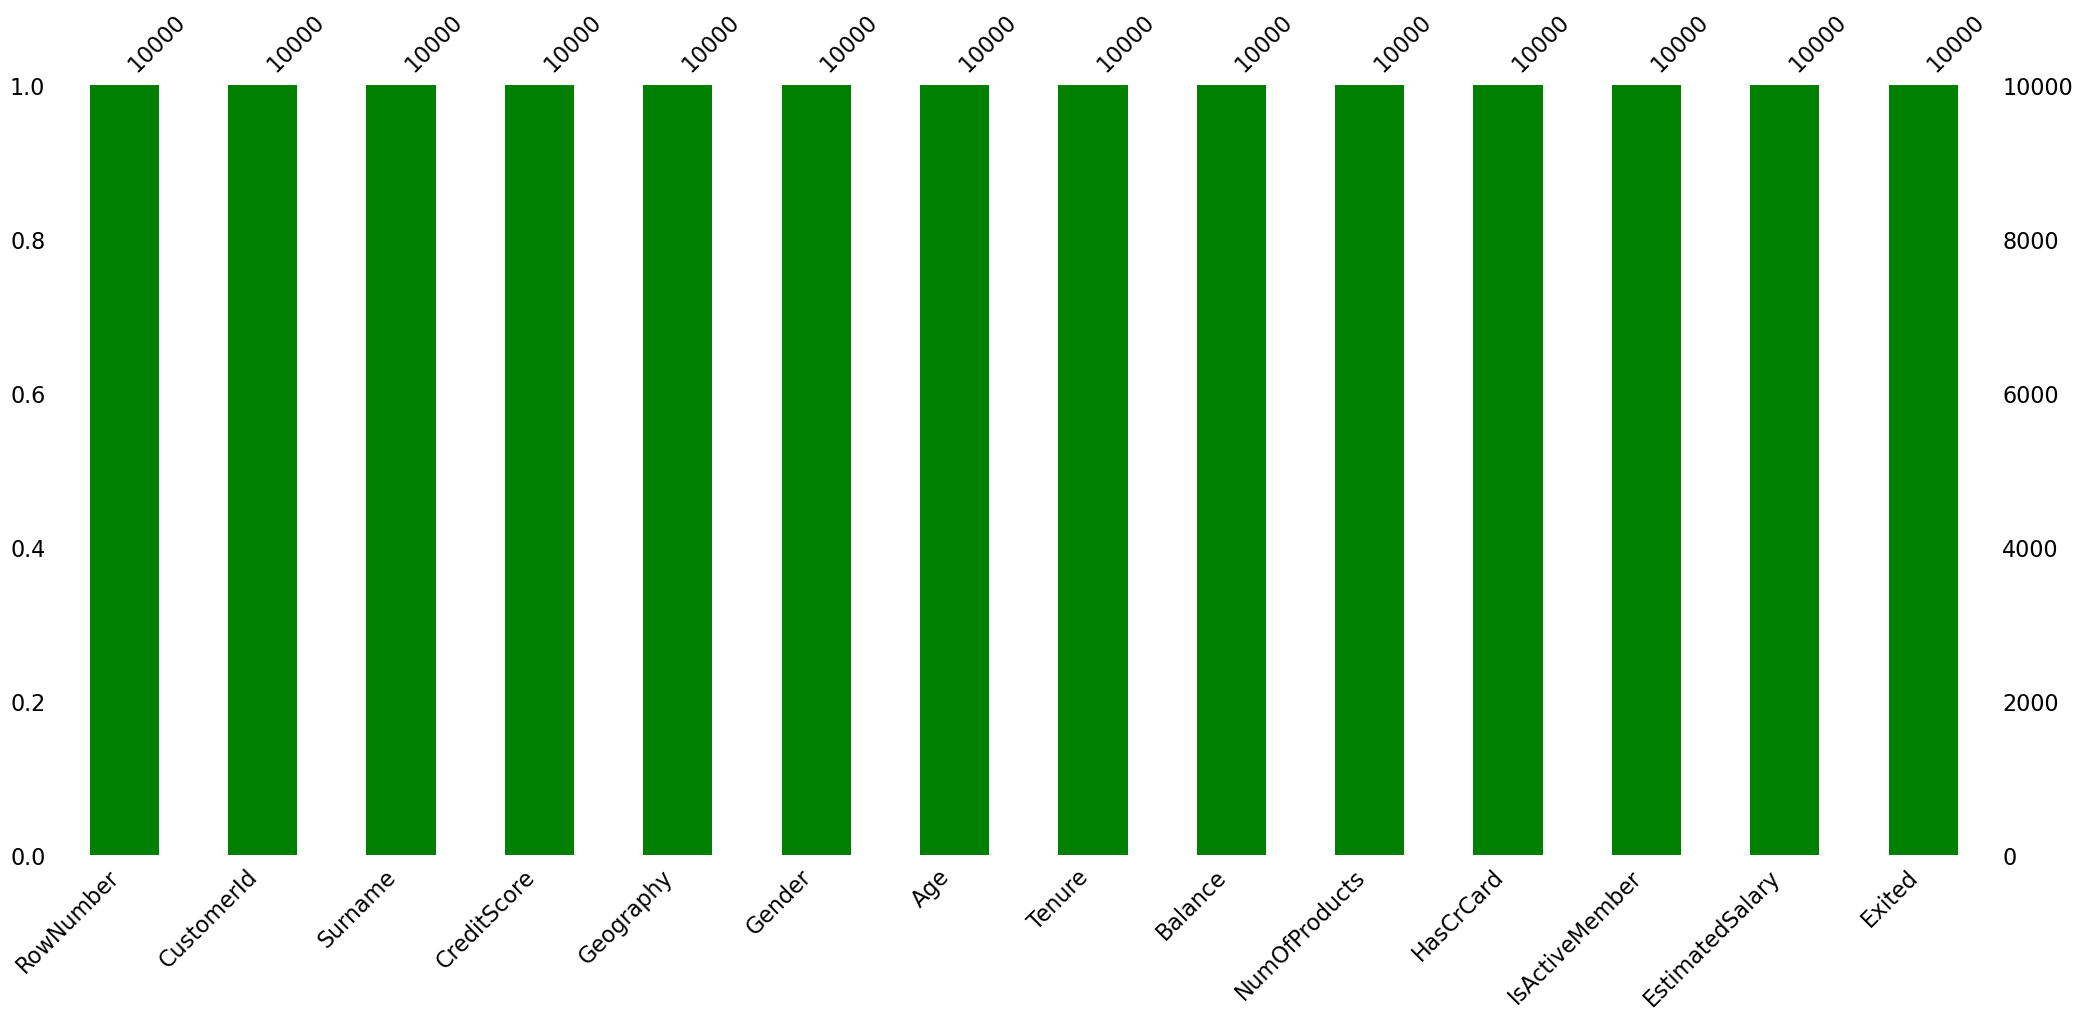

In [7]:
# lets see null values
import missingno as msno
msno.bar(file,color = 'Green')

In [8]:
# checking null values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(file)
missing_values.style.background_gradient(cmap='Greens')

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Their are clearly no null values in the dataset**

----------------------------------------------------------------------------------------------

<p style="color: red; font-weight: bold">Dropping the useless columns</p>

In [9]:
# RowNumber ,surname and customer id dosen't making sense of leaving or staying of customer
file.drop(['RowNumber','CustomerId','Surname'],axis =1, inplace = True)
file

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Analysing the dataset

In [10]:
file['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

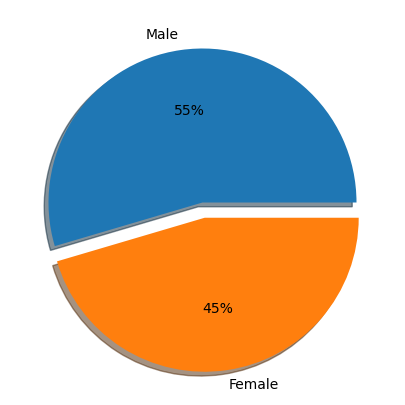

In [11]:
# lets see gender distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.pie(file['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',explode = [0,0.1],shadow = True)
plt.show()

> **Overall the Gender population of Male is more than the Female i.e. 10% of the population**

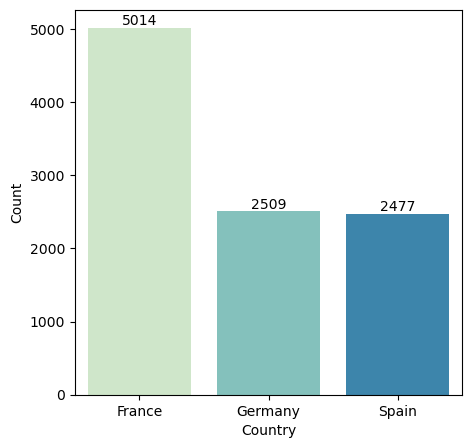

In [12]:
#Geography wise

region = file.Geography.value_counts().to_frame().reset_index()
region.columns = ['Country','Count']

plt.figure(figsize = (5,5))
ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)


> **France has more customers or we can say approx double than other two countries.**

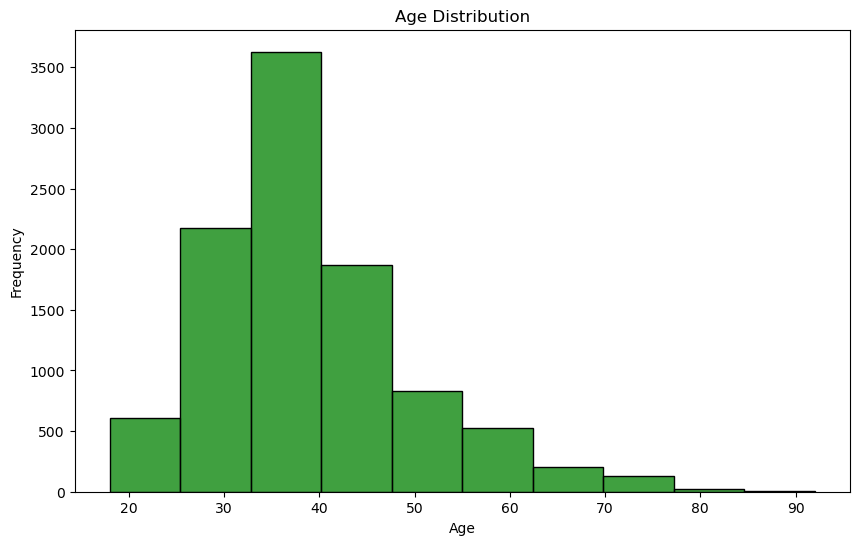

In [13]:
# Plotting Age distribution
plt.figure(figsize=(10, 6)) 

# Create the age distribution plot
ax = sns.histplot(data=file['Age'], bins=10, kde=False,color = 'Green',)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

# Show the plot
plt.show()

> **From above graph we can say that people of age group between 30-40 are more than others.**

--------------------------------------------------------------------------------------------

### Lets analyse the data based on each country

In [14]:
# lets analyse the data based on each country

grouped_geo = file.groupby('Geography')
grouped_geo.get_group('France')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


> **Lets analyse for every country** \
    1.Female to Male ratio\
    2. Average income\
    3. Age distribution\
    4. Exit to exist ratio\
    5. Gender relation to exit to exist

In [15]:
def country_detail(country):
    # 1. get detail
    country_detail = grouped_geo.get_group(country)
    # Customers
    print(f"Total Customers are: {len(country_detail)}")
    #female to male ratio
    print('female to male ratio')
    reg_gen = country_detail['Gender'].value_counts()
    plt.figure(figsize = (10,5))
    plt.pie(reg_gen.values,labels = ['M','F'],autopct = '%.f%%',explode = [0,0.1],shadow = True)
    plt.title(f'Gender pie plot of {country}')
    plt.legend()
    plt.show()
    #Average Income of country
    print("============================================================")
    print('Average income of the country are: {:.2f}'.format(country_detail['EstimatedSalary'].mean()))
    
    #Age distribution
    print("============================================================")
    sns.histplot(country_detail['Age'],bins = 10 , color =  'Green')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title(f"Age Distribution of {country}")
    plt.show()
    #Exit to Exists ratio 
    print("============================================================")
    
    reg_exit = country_detail['Exited'].value_counts()
    plt.figure(figsize = (10,5))
    plt.pie(reg_exit.values,labels = ['Exit','Exist'],autopct = '%.f%%',explode = [0,0.1],shadow = True)
    plt.title(f'Exit to Exists pie plot for {country} region')
    plt.legend()
    plt.show()




France details
Total Customers are: 5014
female to male ratio


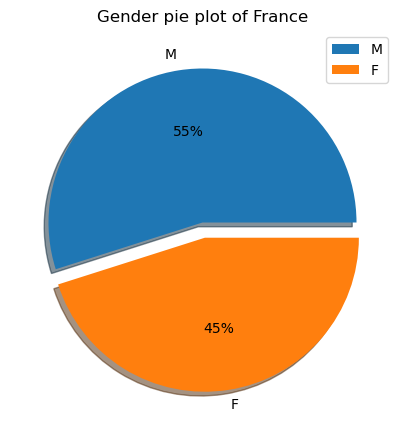

Average income of the country are: 99899.18


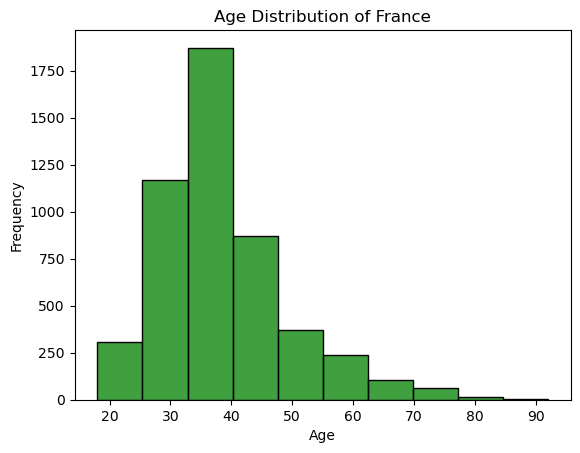

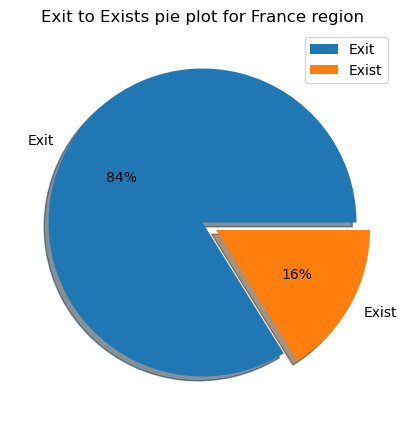




Spain details
Total Customers are: 2477
female to male ratio


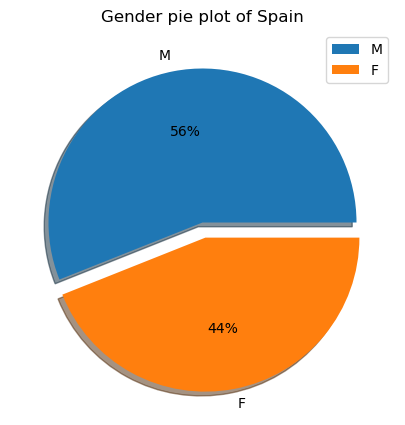

Average income of the country are: 99440.57


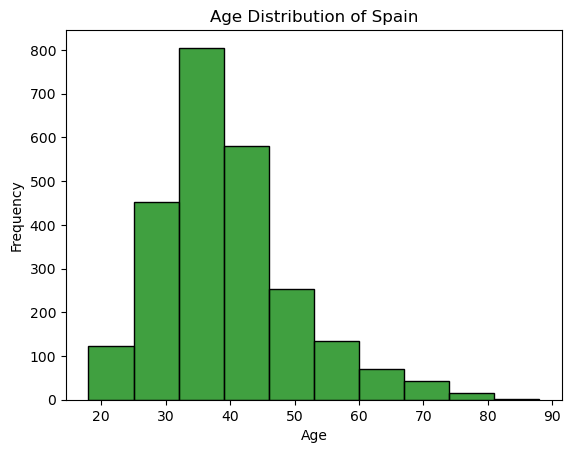

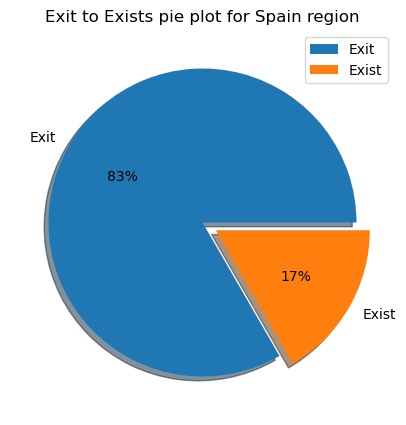




Germany details
Total Customers are: 2509
female to male ratio


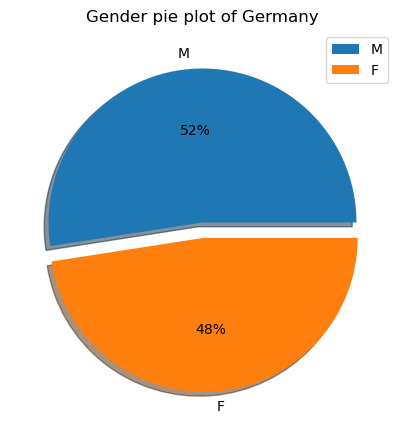

Average income of the country are: 101113.44


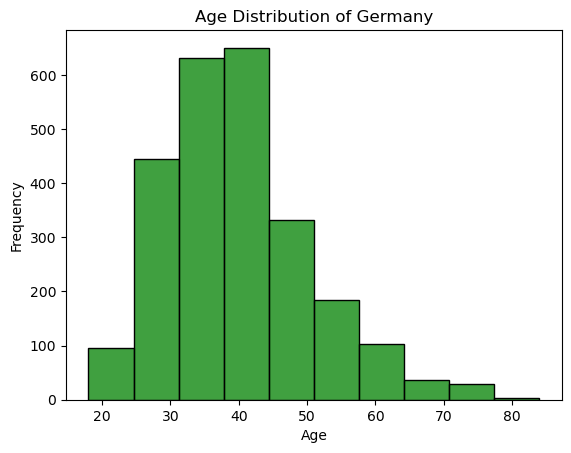

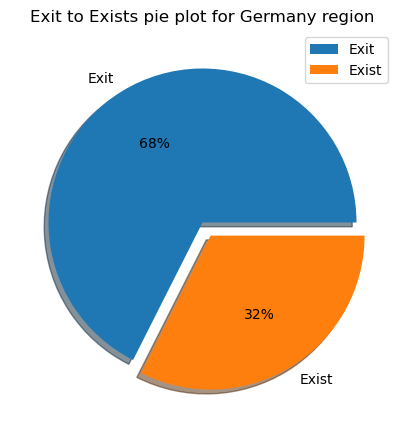

In [16]:
for i in file['Geography'].unique():
    print('\n\n')
    print("============================================================")
    print(f"\033[1m{i} details\033[0m")
    print("============================================================")
    
    country_detail(i)

**from the above graph we can state that**
- Male percentage is little higher in the banks in all countries with highest male ratio in France.
- Customers of France are approx double of the rest country.
- Average income of country Germany is the highest.
    Therefore we can say that Germany population is more richer than other two countries.
- Age group between 30 - 40 are higher in the banks on average.
    France has highest customers between age group of approx 25 - 45.
- Exit percent ratio is more that staying customers ratio with highest leaving ratio in France.

-------------------------------------------------------------------------------------------------

## Lets see the report gender wise

In [17]:
# Lets see the report gender wise
gender_group = file.groupby('Gender')
gender_group.get_group('Male')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...
9992,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [18]:
def Gender_detailed(gender):
    # 1. get detail
    Gender_detail = gender_group.get_group(gender)

    #Average Income of country
    print("============================================================")
    print('Average income of the country are: {:.2f}'.format(Gender_detail['EstimatedSalary'].mean()))
    
    #Age distribution
    print("============================================================")
    sns.histplot(Gender_detail['Age'],bins = 10 , color =  'Green')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title(f"Age Distribution of {gender}")
    plt.show()
    #Exit to Exists ratio 
    print("============================================================")
    
    reg_exit = Gender_detail['Exited'].value_counts()
    plt.figure(figsize = (10,5))
    plt.pie(reg_exit.values,labels = ['Exit','Exist'],autopct = '%.f%%',explode = [0,0.1],shadow = True)
    plt.title(f'Exit to Exists pie plot for {gender} region')
    plt.legend()
    plt.show()

Average income of the country are: 99664.58


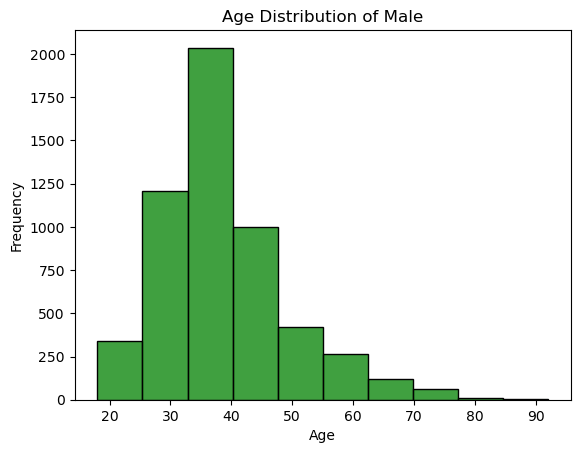

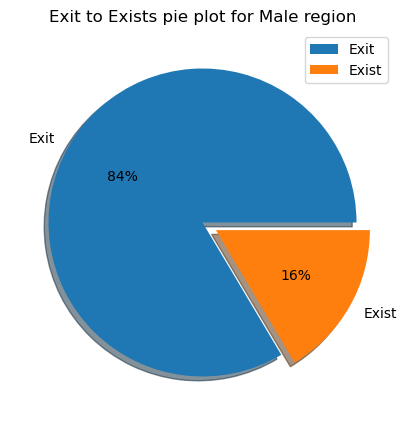

In [19]:
Gender_detailed('Male')

## Gender wise report of all countries

### 1. Male

In [20]:
# lets see each gender country wise
Male_df = gender_group.get_group('Male')
Male_gender_geo = Male_df.groupby('Geography')

In [21]:
def Gender_country_detail(country,gender_geo):
    # 1. get detail
    country_detail = gender_geo.get_group(country)
   
    #Average Income of country
    print("============================================================")
    print('Average income of the country are: {:.2f}'.format(country_detail['EstimatedSalary'].mean()))
    
    #Age distribution
    print("============================================================")
    sns.histplot(country_detail['Age'],bins = 10 , color =  'Green')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title(f"Age Distribution of {country}")
    plt.show()
    #Exit to Exists ratio 
    print("============================================================")
    
    reg_exit = country_detail['Exited'].value_counts()
    plt.figure(figsize = (10,5))
    plt.pie(reg_exit.values,labels = ['Exit','Exist'],autopct = '%.f%%',explode = [0,0.1],shadow = True)
    plt.title(f'Exit to Exists pie plot for {country} region')
    plt.legend()
    plt.show()




Spain details
Average income of the country are: 98425.69


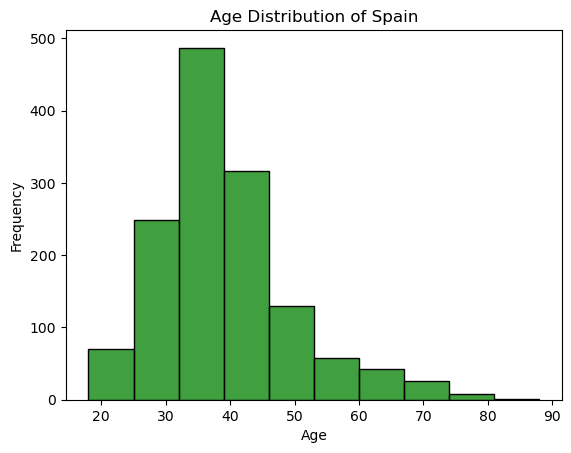

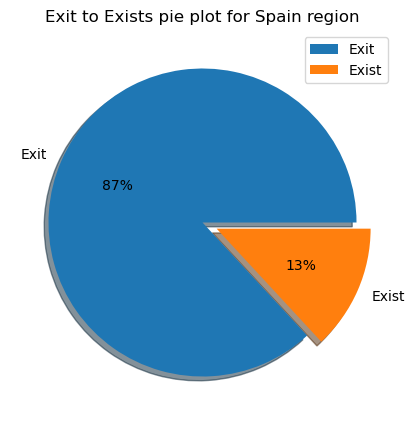




France details
Average income of the country are: 100174.25


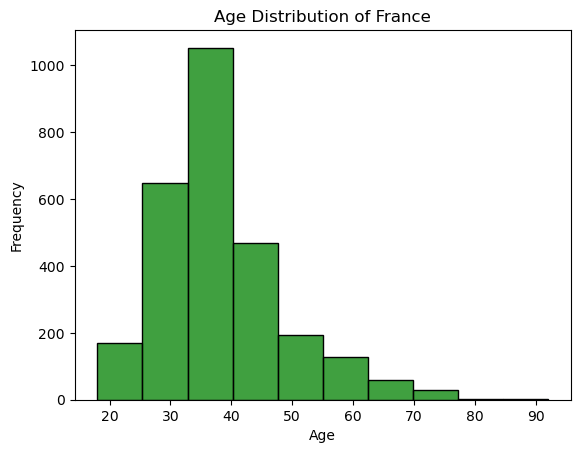

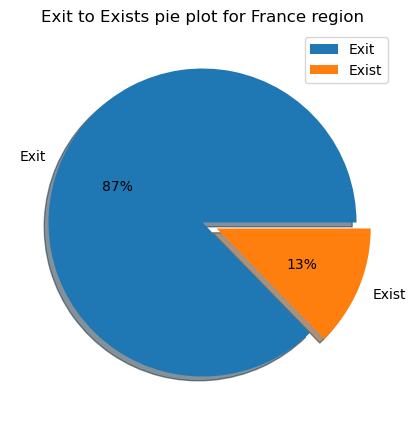




Germany details
Average income of the country are: 99905.03


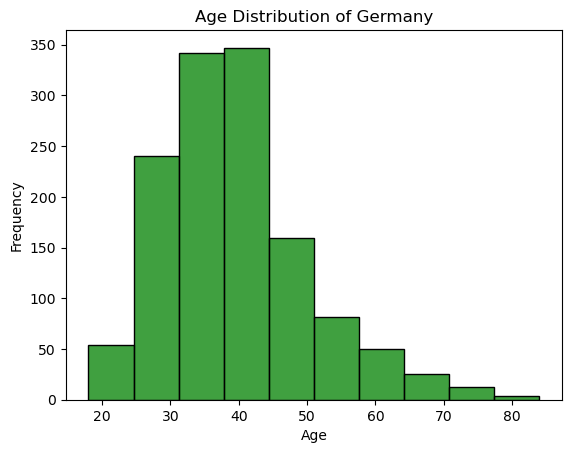

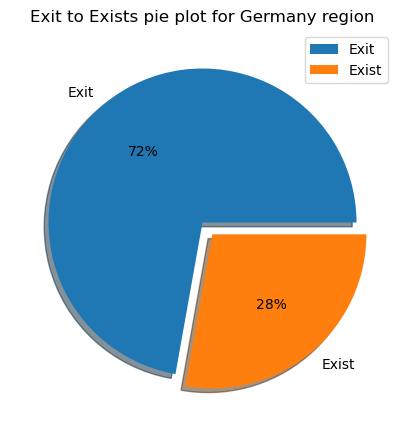

In [22]:
for i in Male_df['Geography'].unique():
    print('\n\n')
    print("============================================================")
    print(f"\033[1m{i} details\033[0m")
    print("============================================================")
    
    Gender_country_detail(i,Male_gender_geo)

### 2. Female

In [23]:
Female_df = gender_group.get_group('Female')
Fem_gender_geo = Female_df.groupby('Geography')

Fem_gender_geo.get_group('France')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
12,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...
9979,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1





France details
Average income of the country are: 99564.25


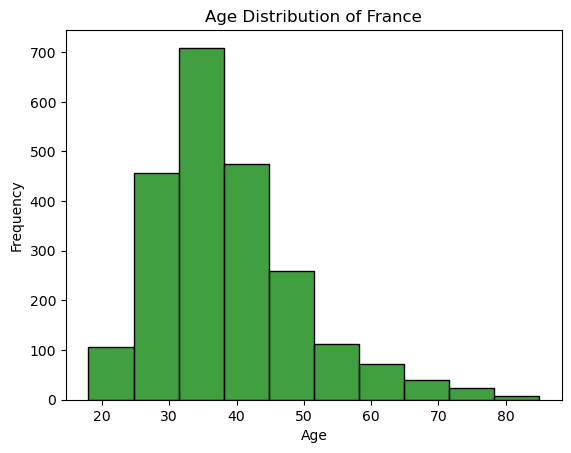

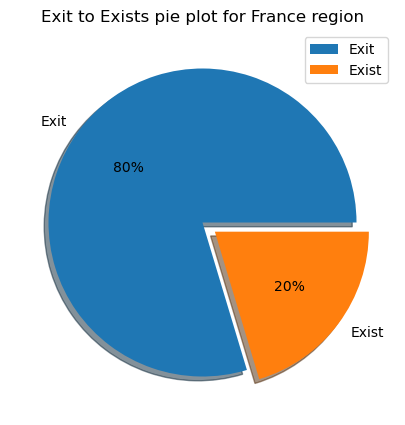




Spain details
Average income of the country are: 100734.11


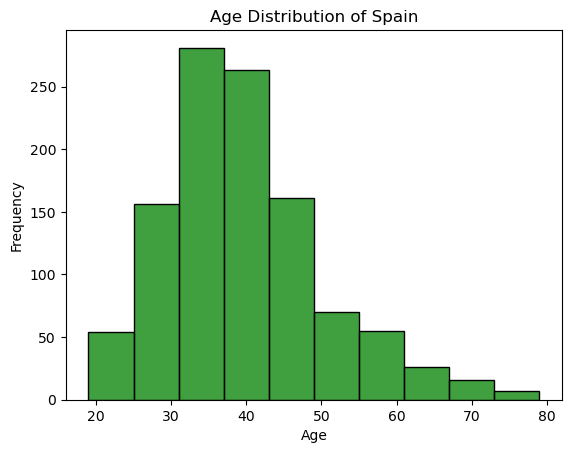

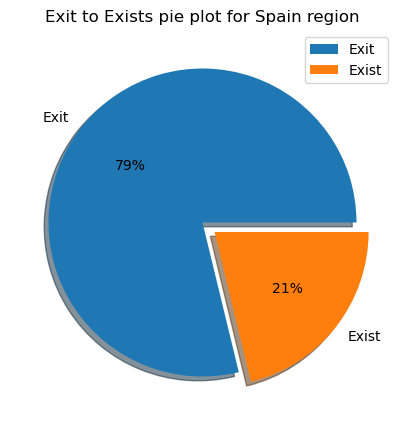




Germany details
Average income of the country are: 102446.42


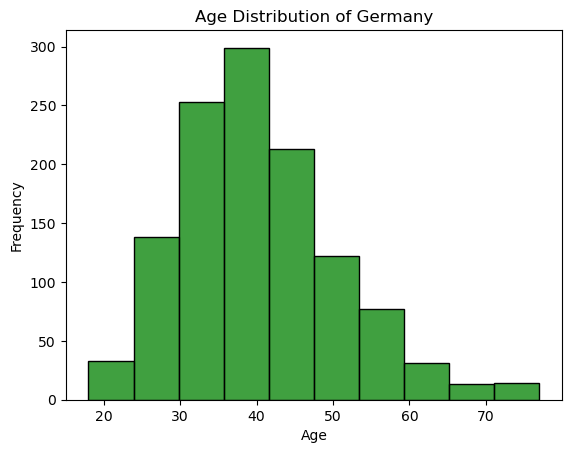

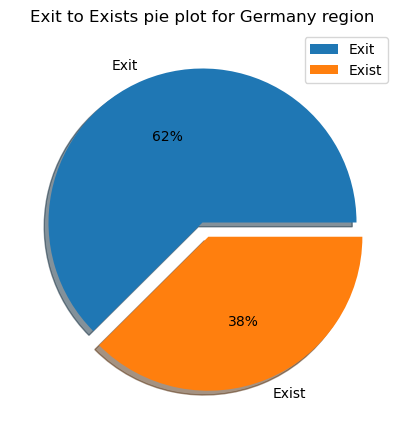

In [24]:
for i in Female_df['Geography'].unique():
    print('\n\n')
    print("============================================================")
    print(f"\033[1m{i} details\033[0m")
    print("============================================================")
    
    Gender_country_detail(i,Fem_gender_geo)

In [25]:
# corremation matrix
dataset = file.drop('Exited',axis = 1)

In [26]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


<Axes: title={'center': 'Correlation with Exited'}>

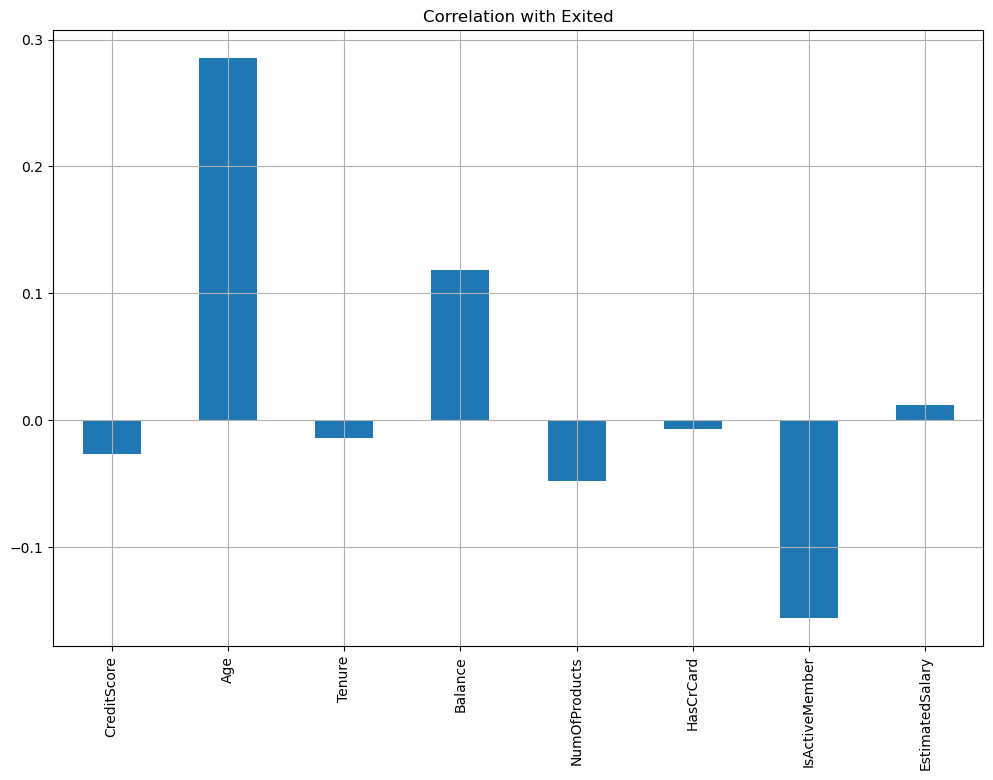

In [27]:
dataset.corrwith(file['Exited'],numeric_only = True).plot.bar(
figsize =(12,8), title = 'Correlation with Exited',rot = 90 , grid = True)

<Axes: >

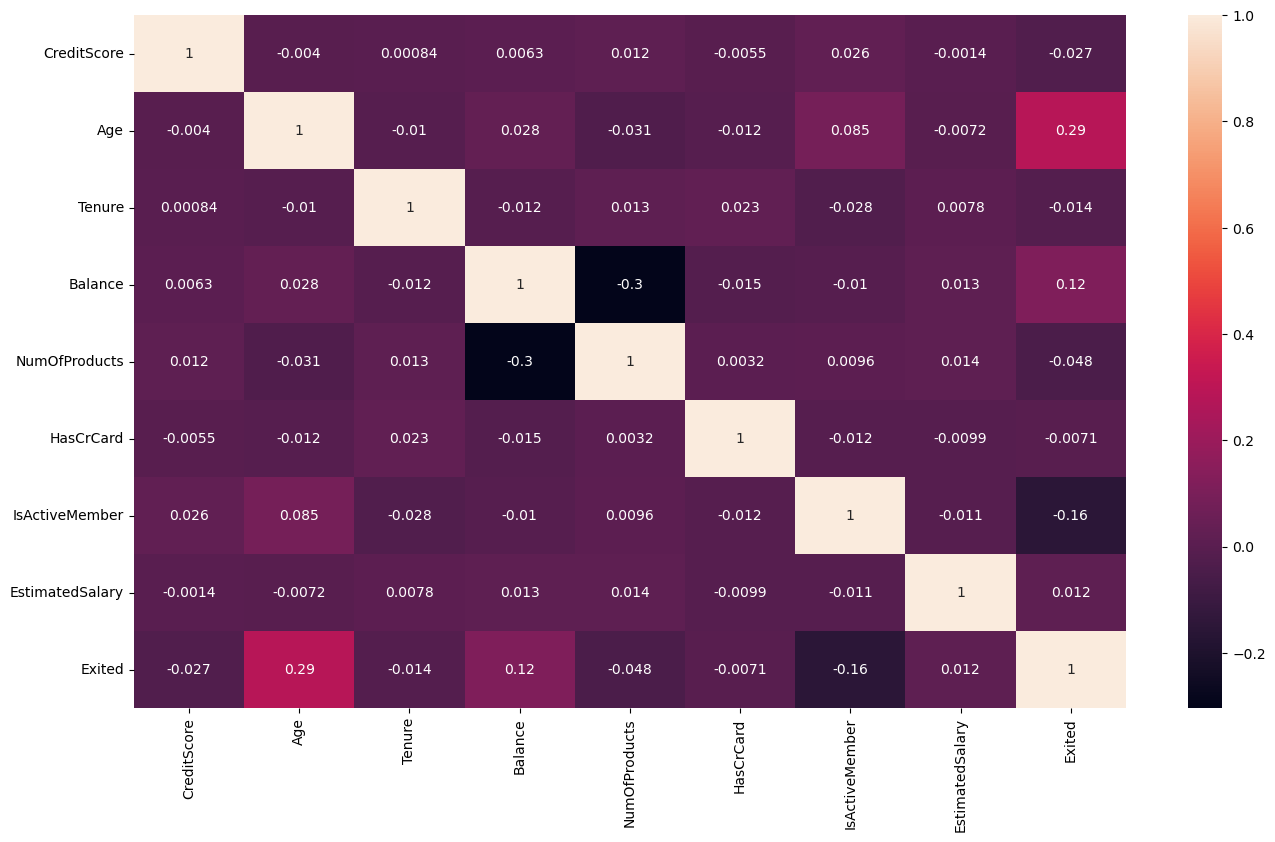

In [28]:
# Heatmap 
# using numeric only to remove warning due to one textual data
plt.figure(figsize = (16,9))
sns.heatmap(file.corr(numeric_only = True),annot = True)

In [29]:
# splitting the data
# x = attributes , y = target

x = dataset
y = file.iloc[:,-1]

In [30]:
# using sklearn to splitting the data for making the model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 100,test_size = 0.3)

In [31]:
X_train.shape

(7000, 10)

In [32]:
X_test.shape

(3000, 10)

### Encoding + Feature scaling the data

In [33]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1191,639,Germany,Male,27,3,150795.81,1,0,1,85208.93
4458,633,France,Male,37,2,0.00,2,1,0,182258.17
1131,500,Spain,Male,37,9,125822.21,1,1,0,111698.00
9562,738,France,Male,39,5,0.00,2,1,1,114388.98
6579,496,France,Female,36,7,0.00,2,0,0,108098.28
...,...,...,...,...,...,...,...,...,...,...
350,659,Spain,Male,32,3,107594.11,2,1,1,102416.84
79,416,Germany,Female,41,10,122189.66,2,1,0,98301.61
8039,672,France,Female,43,4,92599.55,2,1,1,167336.78
6936,592,France,Female,31,2,84102.11,2,0,1,116385.24


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [35]:
transformer = ColumnTransformer(
                transformers = [
                    ('state',OneHotEncoder(handle_unknown='ignore',sparse_output = False,drop = 'first'),['Geography','Gender'])
                      ],remainder = 'passthrough')

In [36]:
X_train_trf = transformer.fit_transform(X_train)

In [37]:
X_test_trf = transformer.transform(X_test)

### Feature scaling

In [38]:
Scaler = StandardScaler()

In [39]:
X_train_trfs = Scaler.fit_transform(X_train_trf)

In [40]:
X_test_trfs = Scaler.transform(X_test_trf)

In [41]:
X_test_trfs

array([[ 1.71183416, -0.57383115,  0.91265577, ...,  0.64931383,
        -1.02283201,  0.82309989],
       [ 1.71183416, -0.57383115, -1.09570336, ...,  0.64931383,
         0.97767765,  1.09869922],
       [ 1.71183416, -0.57383115,  0.91265577, ...,  0.64931383,
        -1.02283201,  0.37665424],
       ...,
       [-0.58416874,  1.74267291,  0.91265577, ..., -1.54008733,
        -1.02283201, -1.62395297],
       [-0.58416874, -0.57383115, -1.09570336, ..., -1.54008733,
        -1.02283201,  1.58742271],
       [-0.58416874, -0.57383115, -1.09570336, ..., -1.54008733,
        -1.02283201, -1.36751785]])

# Build the model

## 1. Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)

In [43]:
classifier_lr.fit(X_train_trfs,y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred_lr = classifier_lr.predict(X_test_trfs)

In [45]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('The accuracy of our Logistic regression model is: {:.2f}%'.format(accuracy_score(y_test,y_pred_lr)*100))

The accuracy of our Logistic regression model is: 81.10%


<Axes: >

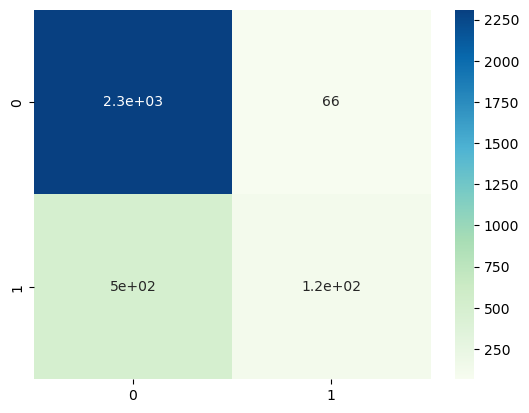

In [47]:
#  lets see confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot = True,cmap = 'GnBu')

We got 566 wrong prediction through Logistic Regression

In [48]:
# checking classification report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2376
           1       0.65      0.20      0.30       624

    accuracy                           0.81      3000
   macro avg       0.74      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr,X=X_train_trfs,y= y_train,cv = 10)

In [50]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))

Accuracy is 81.01%


In [51]:
print(accuracies)

[0.79857143 0.81857143 0.81       0.81714286 0.82285714 0.79285714
 0.81142857 0.80285714 0.82       0.80714286]


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0)
classifier_rf.fit(X_train_trfs,y_train)

RandomForestClassifier(random_state=0)

In [53]:
y_pred_rf = classifier_rf.predict(X_test_trfs)

In [54]:
print('The accuracy of our Logistic regression model is: {:.2f}%'.format(accuracy_score(y_test,y_pred_rf)*100))

The accuracy of our Logistic regression model is: 86.03%


<Axes: >

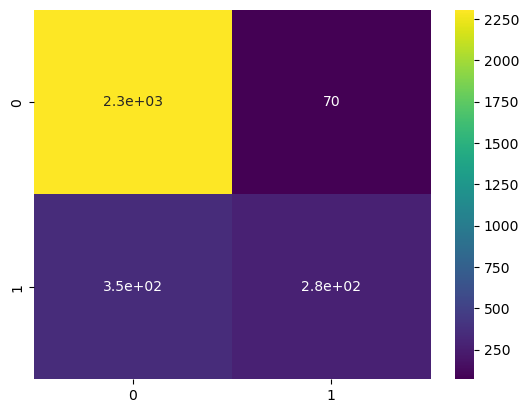

In [55]:
#  lets see confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot = True,cmap = 'viridis')

we got 420 wrongs from total dataset

In [56]:
#Orinting Classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.868550,0.970539,0.916716,2376.000000
1,0.797101,0.440705,0.567595,624.000000
accuracy,0.860333,0.860333,0.860333,0.860333
macro avg,0.832826,0.705622,0.742156,3000.000000
weighted avg,0.853689,0.860333,0.844099,3000.000000


In [57]:
# using cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf,X=X_train_trfs,y= y_train,cv = 10)
print("Accuracy of random forest cross validation is {:.2f}%".format(accuracies.mean()*100))

Accuracy of random forest cross validation is 86.34%
